In [1]:

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime
plt.style.use('fivethirtyeight')

import statsmodels.api as sm

In [2]:
cs = pd.read_csv('customer_segmentation.csv')
cs

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
cs.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
cs.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
cs.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
x = cs[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Kmeans

In [8]:
# TRain our model on train data x
from sklearn.cluster import KMeans

kmean = KMeans()
kmean.fit(x)


KMeans()

In [9]:
# Predict and fit model

kmean = KMeans()
kmean.fit_predict(x)



array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 7, 7,
       5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 1, 7, 7, 7, 7,
       7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6,
       0, 6])

# Elbow method to find optimal no of cluster

Text(0, 0.5, 'Within-Cluster-Sum-of-Squares (WCSS)')

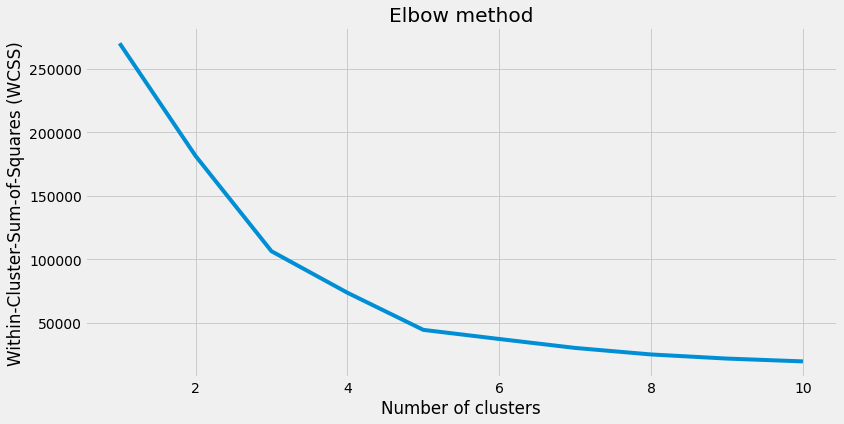

In [10]:
from sklearn.cluster import KMeans


wcss=[]
for i in range(1,11):
    kmean = KMeans(n_clusters = i)
    kmean.fit(x) 
    wcss.append(kmean.inertia_)

wcss

# plot for optimal number
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')


In [11]:
# Train our model
x = cs[['Annual Income (k$)','Spending Score (1-100)']]

kmean = KMeans(n_clusters = 5,random_state = 42)
y_kmean = kmean.fit_predict(x)

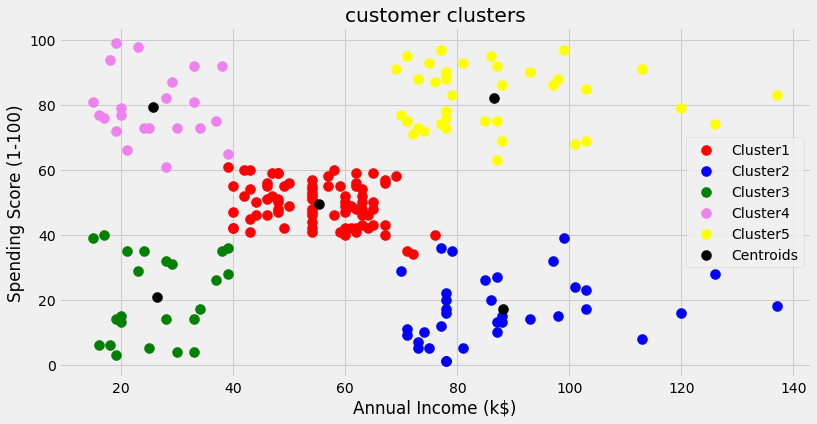

In [12]:
# plot customer clusters
plt.figure(figsize=(12,6))
plt.scatter(x.iloc[y_kmean == 0, 0], x.iloc[y_kmean == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(x.iloc[y_kmean == 1, 0], x.iloc[y_kmean == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(x.iloc[y_kmean == 2, 0], x.iloc[y_kmean == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(x.iloc[y_kmean == 3, 0], x.iloc[y_kmean == 3, 1], s = 100, c = 'violet', label = 'Cluster4')
plt.scatter(x.iloc[y_kmean == 4, 0], x.iloc[y_kmean == 4, 1], s = 100, c = 'yellow', label = 'Cluster5') 
            
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('customer clusters')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 

plt.show()
